In [3]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'

link = 'https://rally-base.com/2024/eko-acropolis-rally-2024/?ssId='
startat, no_ss=8436, int(15) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [4]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

C:\Users\ilias\AppData\Local\Temp\ipykernel_4684\3485066229.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('-', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_4684\3485066229.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('-', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_4684\3485066229.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('-', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_4684\3485066229.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('-', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_4684\3485066229.

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,17,Ogier S.,RC1,00:16:33.2,81.45 0.00,00:00:00.0 00:00:00.0,1,Acropolis,1
2,2,8,Tänak Ott,RC1,00:16:33.8,81.40 0.03,00:00:00.6 00:00:00.6,1,Acropolis,2
3,3,16,Fourmaux,RC1,00:16:34.0,81.38 0.04,00:00:00.8 00:00:00.2,1,Acropolis,3
4,4,18,Katsuta T,RC1,00:16:35.9,81.23 0.12,00:00:02.7 00:00:01.9,1,Acropolis,4
5,5,6,Sordo Dan,RC1,00:16:42.5,80.69 0.41,00:00:09.3 00:00:06.6,1,Acropolis,5
...,...,...,...,...,...,...,...,...,...,...
47,47,64,Rensonnet,RC3,00:16:03.2,68.36 17.46,00:05:19.4 00:00:00.2,15,Acropolis,47
48,48,84,Papageorgi,RC4,00:17:49.4,61.57 23.27,00:07:05.6 00:01:46.2,15,Acropolis,48
49,49,71,Martinez,RC3,00:18:07.0,60.57 24.23,00:07:23.2 00:00:17.6,15,Acropolis,49
50,50,85,Parellis,RC5,00:27:58.4,39.23 56.57,00:17:14.6 00:09:51.4,15,Acropolis,50


In [6]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_ClassView

0                              Pos.                                          \
ss                               1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                     
6   Sordo  Dan RC1   Acropolis    5   5   3   3   2   2   3   2  15   4   6   
8   Tänak  Ott RC1   Acropolis    2   2   4   2   1   3  50   5   3   1   2   
11  Neuville   RC1   Acropolis    6   6   5   5   4   1   1   3   2   3   3   
13  Munster  G RC1   Acropolis    8   8   7   4   3  30   5   6  55  53  46   
16  Fourmaux   RC1   Acropolis    3   4   2  63  60  56   6   7   5   5   5   
...                             ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
81  Lefkaditis RC4   Acropolis   18  58  56  54  48  51  57  61  49  49  40   
82  Plagos  Io RC4   Acropolis   18  56  55  56  52  52  64  62  62  63  60   
83  Kalamaras  RC4   Acropolis   18  60  61  58  54  53  60  54  52  51  41   
84  Papageorgi RC4   Acropolis   18  65  63  61  59  65  62  62  62  63  60   
85  Parellis   RC5   Acropolis   18  63  62  60  56  54  59  55  53  52  56   

0                                               
ss                              12  13  14  15  
No. Crew       Group Race                       
6   Sordo  Dan RC1   Acropolis   3   8   7   6  
8   Tänak  Ott RC1   Acropolis   5   3   2   2  
11  Neuville   RC1   Acropolis   1   2   6   4  
13  Munster  G RC1   Acropolis   -   -   -   -  
16  Fourmaux   RC1   Acropolis  15   4   5   1  
...                             ..  ..  ..  ..  
81  Lefkaditis RC4   Acropolis  37  53  40  40  
82  Plagos  Io RC4   Acropolis  57  52  40  44  
83  Kalamaras  RC4   Acropolis  40  54  40  45  
84  Papageorgi RC4   Acropolis  57  56  40  48  
85  Parellis   RC5   Acropolis  42  55  40  50  

[70 rows x 15 columns]

In [10]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,17,Ogier S.,RC1,1,Acropolis,1,993.2
2,8,Tänak Ott,RC1,1,Acropolis,2,993.8
3,16,Fourmaux,RC1,1,Acropolis,3,994.0
4,18,Katsuta T,RC1,1,Acropolis,4,995.9
5,6,Sordo Dan,RC1,1,Acropolis,5,1002.5
...,...,...,...,...,...,...,...
47,64,Rensonnet,RC3,15,Acropolis,47,963.2
48,84,Papageorgi,RC4,15,Acropolis,48,1069.4
49,71,Martinez,RC3,15,Acropolis,49,1087.0
50,85,Parellis,RC5,15,Acropolis,50,1678.4


In [11]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Acropolis 1      993.2
          2     1005.3
          3     1026.3
          4      971.0
          5      987.2
          6     1016.9
          7     1071.3
          8      893.9
          9     1094.1
          10     547.0
          11    1069.0
          12     104.6
          13     840.6
          14     698.6
          15     643.8

In [12]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,17,Ogier S.,RC1,1,Acropolis,1,993.2,993.2
1,8,Tänak Ott,RC1,1,Acropolis,2,993.8,993.2
2,16,Fourmaux,RC1,1,Acropolis,3,994.0,993.2
3,18,Katsuta T,RC1,1,Acropolis,4,995.9,993.2
4,6,Sordo Dan,RC1,1,Acropolis,5,1002.5,993.2
...,...,...,...,...,...,...,...,...
945,64,Rensonnet,RC3,15,Acropolis,47,963.2,643.8
946,84,Papageorgi,RC4,15,Acropolis,48,1069.4,643.8
947,71,Martinez,RC3,15,Acropolis,49,1087.0,643.8
948,85,Parellis,RC5,15,Acropolis,50,1678.4,643.8


In [13]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Acropolis,1,993.2,993.2,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Acropolis,2,993.8,993.2,0.6,0.060411,01
2,16,Fourmaux,RC1,1,Acropolis,3,994.0,993.2,0.8,0.080548,01
3,18,Katsuta T,RC1,1,Acropolis,4,995.9,993.2,2.7,0.271849,01
4,6,Sordo Dan,RC1,1,Acropolis,5,1002.5,993.2,9.3,0.936367,01
...,...,...,...,...,...,...,...,...,...,...,...
945,64,Rensonnet,RC3,15,Acropolis,47,963.2,643.8,319.4,49.611681,15
946,84,Papageorgi,RC4,15,Acropolis,48,1069.4,643.8,425.6,66.107487,15
947,71,Martinez,RC3,15,Acropolis,49,1087.0,643.8,443.2,68.841255,15
948,85,Parellis,RC5,15,Acropolis,50,1678.4,643.8,1034.6,160.702081,15


In [14]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Acropolis,1,993.2,993.2,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Acropolis,2,993.8,993.2,0.6,0.060411,01
2,16,Fourmaux,RC1,1,Acropolis,3,994.0,993.2,0.8,0.080548,01
3,18,Katsuta T,RC1,1,Acropolis,4,995.9,993.2,2.7,0.271849,01
4,6,Sordo Dan,RC1,1,Acropolis,5,1002.5,993.2,9.3,0.936367,01
...,...,...,...,...,...,...,...,...,...,...,...
902,11,Neuville,RC1,15,Acropolis,4,661.2,643.8,17.4,2.702703,15
903,18,Katsuta T,RC1,15,Acropolis,5,669.7,643.8,25.9,4.022989,15
904,6,Sordo Dan,RC1,15,Acropolis,6,674.7,643.8,30.9,4.799627,15
912,19,Serderidis,RC1,15,Acropolis,14,744.9,643.8,101.1,15.703635,15


In [15]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Acropolis,1,993.2,993.2,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Acropolis,2,993.8,993.2,0.6,0.060411,01
2,16,Fourmaux,RC1,1,Acropolis,3,994.0,993.2,0.8,0.080548,01
3,18,Katsuta T,RC1,1,Acropolis,4,995.9,993.2,2.7,0.271849,01
4,6,Sordo Dan,RC1,1,Acropolis,5,1002.5,993.2,9.3,0.936367,01
...,...,...,...,...,...,...,...,...,...,...,...
902,11,Neuville,RC1,15,Acropolis,4,661.2,643.8,17.4,2.702703,15
903,18,Katsuta T,RC1,15,Acropolis,5,669.7,643.8,25.9,4.022989,15
904,6,Sordo Dan,RC1,15,Acropolis,6,674.7,643.8,30.9,4.799627,15
912,19,Serderidis,RC1,15,Acropolis,14,744.9,643.8,101.1,15.703635,15


In [16]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Acropolis                                                         \
SS.               01     02     03     04     05     06     07    08     09   
Crew                                                                          
Evans  Elf     129.6  198.8  212.8   15.4   10.1   45.8   21.5  12.8    6.4   
Fourmaux         0.8    4.1    4.9  600.0  600.0  600.0   27.1  16.3    7.6   
Katsuta  T       2.7    0.0  600.0  600.0  600.0  600.0   41.8  19.4   21.6   
Munster  G      21.6   26.5   28.7   12.6    6.2  149.8   23.5  14.6  600.0   
Neuville        10.3   16.7   12.6   13.2    9.4    0.0    0.0  10.5    5.7   
Ogier  S.        0.0    3.9    0.0    0.0   16.7  142.8    0.2   0.0    0.0   
Serderidis     103.3  103.6  116.4  103.4  102.8  116.0  141.0  94.8  108.2   
Sordo  Dan       9.3    4.9    9.1   10.3    4.5    0.7   16.2   7.4   51.3   
Tänak  Ott       0.6    1.9   11.2    1.9    0.0    1.4  246.4  14.1    6.2   

Race                                                  
SS.            10     11     12    13     14      15  
Crew                                                  
Evans  Elf   11.4  307.1  600.0  22.3    2.5    10.8  
Fourmaux     10.3   15.4    6.0  21.1    5.0     0.0  
Katsuta  T   45.7   10.9    2.6  28.9    4.3    25.9  
Munster  G  600.0  600.0    NaN   NaN    NaN     NaN  
Neuville      2.6    5.5    0.0   5.3   13.2    17.4  
Ogier  S.     2.4    0.0    0.4   0.0    0.0  1379.5  
Serderidis   59.0  115.7    9.3  98.1  135.1   101.1  
Sordo  Dan    7.3   18.1    2.3  31.9   16.2    30.9  
Tänak  Ott    0.0    0.5    2.8  10.5    2.5     1.0

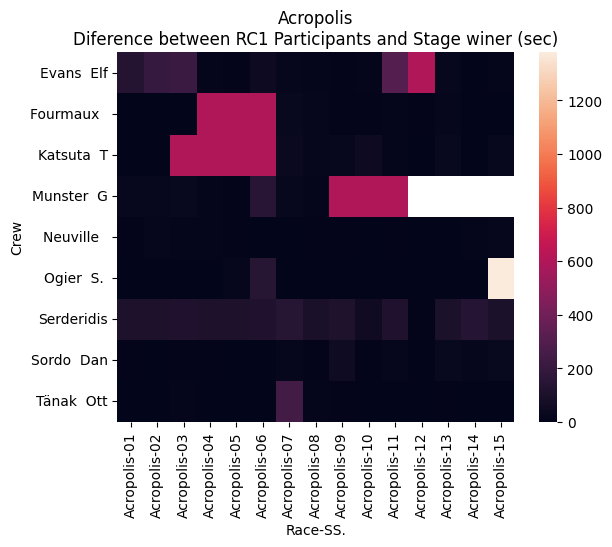

In [17]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

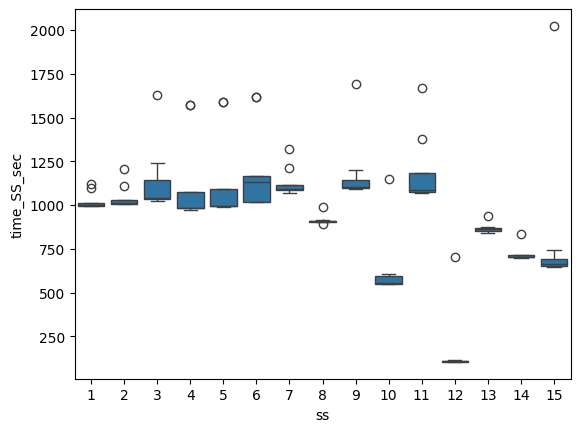

In [18]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

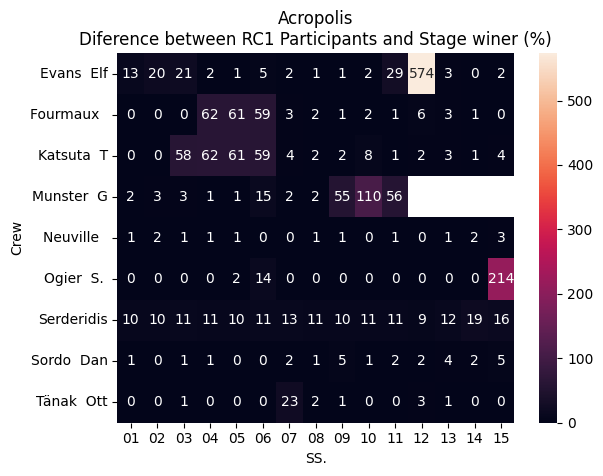

In [19]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")

In [20]:
ss_times_WRC2 = ss_times_WRC[ss_times_WRC['Crew']!= 'Serderidis']
ss_times_WRC2

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Acropolis,1,993.2,993.2,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Acropolis,2,993.8,993.2,0.6,0.060411,01
2,16,Fourmaux,RC1,1,Acropolis,3,994.0,993.2,0.8,0.080548,01
3,18,Katsuta T,RC1,1,Acropolis,4,995.9,993.2,2.7,0.271849,01
4,6,Sordo Dan,RC1,1,Acropolis,5,1002.5,993.2,9.3,0.936367,01
...,...,...,...,...,...,...,...,...,...,...,...
901,33,Evans Elf,RC1,15,Acropolis,3,654.6,643.8,10.8,1.677540,15
902,11,Neuville,RC1,15,Acropolis,4,661.2,643.8,17.4,2.702703,15
903,18,Katsuta T,RC1,15,Acropolis,5,669.7,643.8,25.9,4.022989,15
904,6,Sordo Dan,RC1,15,Acropolis,6,674.7,643.8,30.9,4.799627,15


In [21]:
ss_times_F6 =ss_times_WRC2.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F7 = pd.pivot_table(ss_times_F6, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F7

Race       Acropolis                                                         \
SS.               01     02     03     04     05     06     07    08     09   
Crew                                                                          
Evans  Elf     129.6  198.8  212.8   15.4   10.1   45.8   21.5  12.8    6.4   
Fourmaux         0.8    4.1    4.9  600.0  600.0  600.0   27.1  16.3    7.6   
Katsuta  T       2.7    0.0  600.0  600.0  600.0  600.0   41.8  19.4   21.6   
Munster  G      21.6   26.5   28.7   12.6    6.2  149.8   23.5  14.6  600.0   
Neuville        10.3   16.7   12.6   13.2    9.4    0.0    0.0  10.5    5.7   
Ogier  S.        0.0    3.9    0.0    0.0   16.7  142.8    0.2   0.0    0.0   
Sordo  Dan       9.3    4.9    9.1   10.3    4.5    0.7   16.2   7.4   51.3   
Tänak  Ott       0.6    1.9   11.2    1.9    0.0    1.4  246.4  14.1    6.2   

Race                                                 
SS.            10     11     12    13    14      15  
Crew                                                 
Evans  Elf   11.4  307.1  600.0  22.3   2.5    10.8  
Fourmaux     10.3   15.4    6.0  21.1   5.0     0.0  
Katsuta  T   45.7   10.9    2.6  28.9   4.3    25.9  
Munster  G  600.0  600.0    NaN   NaN   NaN     NaN  
Neuville      2.6    5.5    0.0   5.3  13.2    17.4  
Ogier  S.     2.4    0.0    0.4   0.0   0.0  1379.5  
Sordo  Dan    7.3   18.1    2.3  31.9  16.2    30.9  
Tänak  Ott    0.0    0.5    2.8  10.5   2.5     1.0

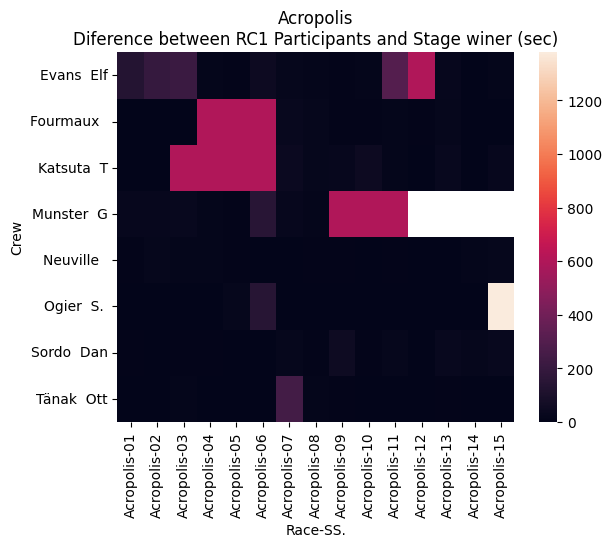

In [22]:
Heatmap_WRC2 = sns.heatmap(ss_times_F7)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_No_Serderidis.png")

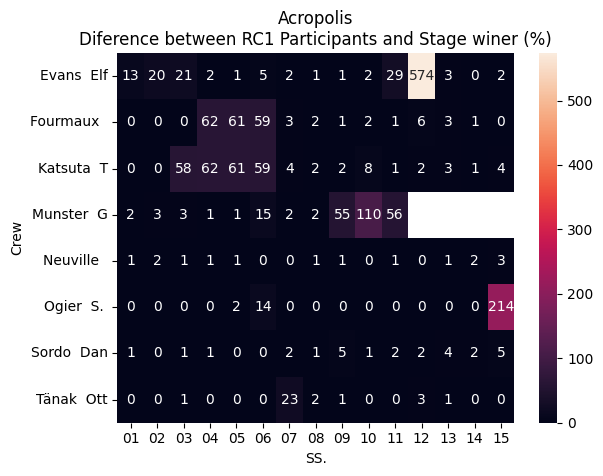

In [23]:
ss_timesb = pd.pivot_table(ss_times_WRC2, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesb, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1_No_Serderidis.jpg")